# Introduction to EDA using Matplotlib and Seaborn

In [4]:
import numpy as np 
import pandas as pd

# The two libraries for Matplotlib and Seaborn
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Using the movies.csv as the dataset for examples.

movies = pd.read_csv("./movies.csv")

FileNotFoundError: [Errno 2] No such file or directory: './movies.csv'

In [3]:
movies.dtypes

MovieID           int64
Title            object
MPAA Rating      object
Budget          float64
Gross           float64
Release Date     object
Genre            object
Runtime         float64
Rating          float64
Rating Count    float64
Summary          object
dtype: object

In [4]:
movies.drop([615], axis=0, inplace=True)

In [5]:
movies.drop(columns=["Summary", "MovieID"], inplace=True)

In [2]:
movies["Budget"] = movies["Budget"].astype("int")
movies["Gross"] = movies["Gross"].astype("int")
movies["Release Date"] = pd.to_datetime(
    movies["Release Date"], format='%Y-%m-%d', errors='ignore')


NameError: name 'movies' is not defined

In [7]:
movies.dtypes

Title                   object
MPAA Rating             object
Budget                   int64
Gross                    int64
Release Date    datetime64[ns]
Genre                   object
Runtime                float64
Rating                 float64
Rating Count           float64
dtype: object

## Bar chart / countplot

no histograms -> they are used to show a distribution, which means that the order of the x axis has a meaning. in this case, to show the count of different genres in the dataset, we will use a bar chart or a count plot

### Matplotlib

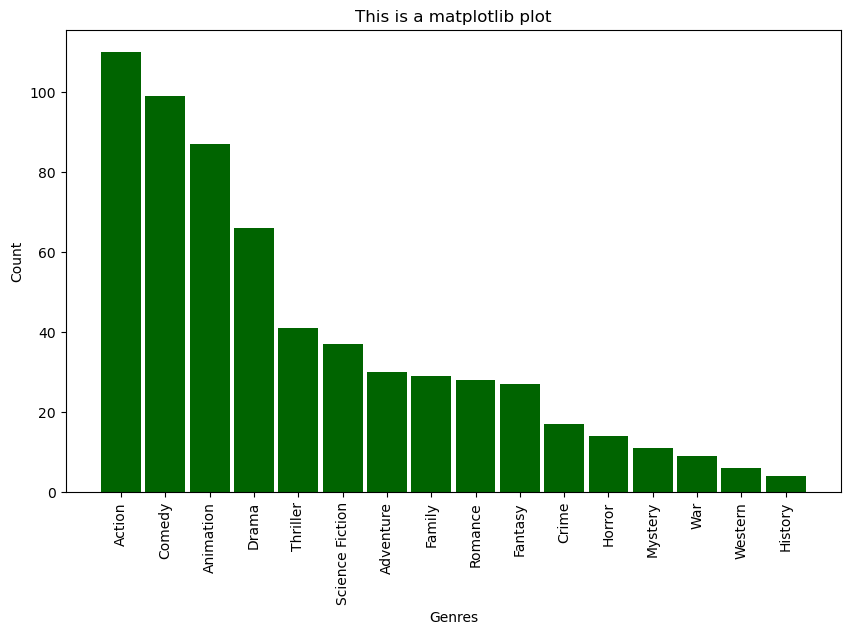

In [45]:
unique_genres_count = movies["Genre"].value_counts()
plt.figure(figsize=(10, 6)) # Size of the plot

plt.bar(unique_genres_count.index, unique_genres_count, width=0.9, color="darkgreen")

plt.title("This is a matplotlib plot")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Seaborn

In [9]:
# sns.barplot(data=movies, x="Genre", y="?")


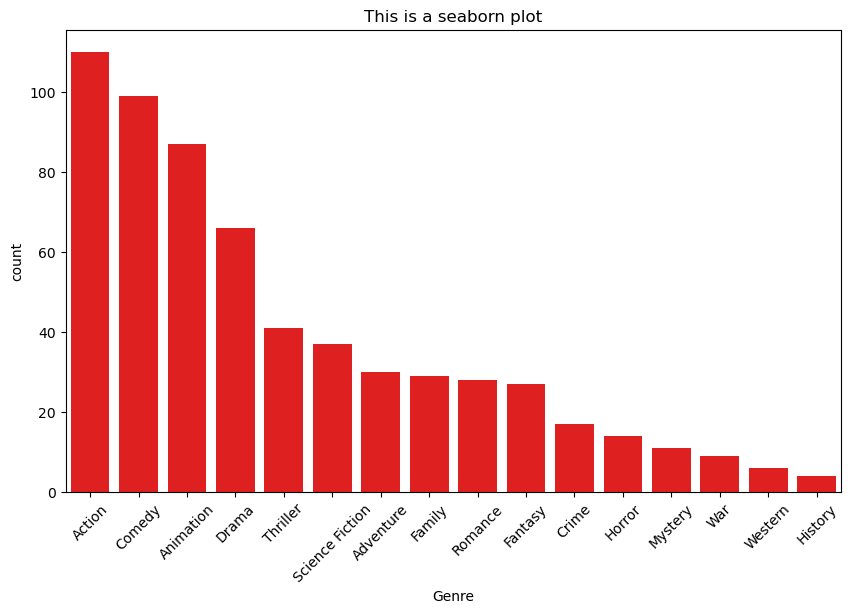

In [10]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title("This is a seaborn plot")

sns.countplot(x = movies["Genre"], order = movies["Genre"].value_counts().index, color="red")

plt.show()


## Histogram

### Matplotlib

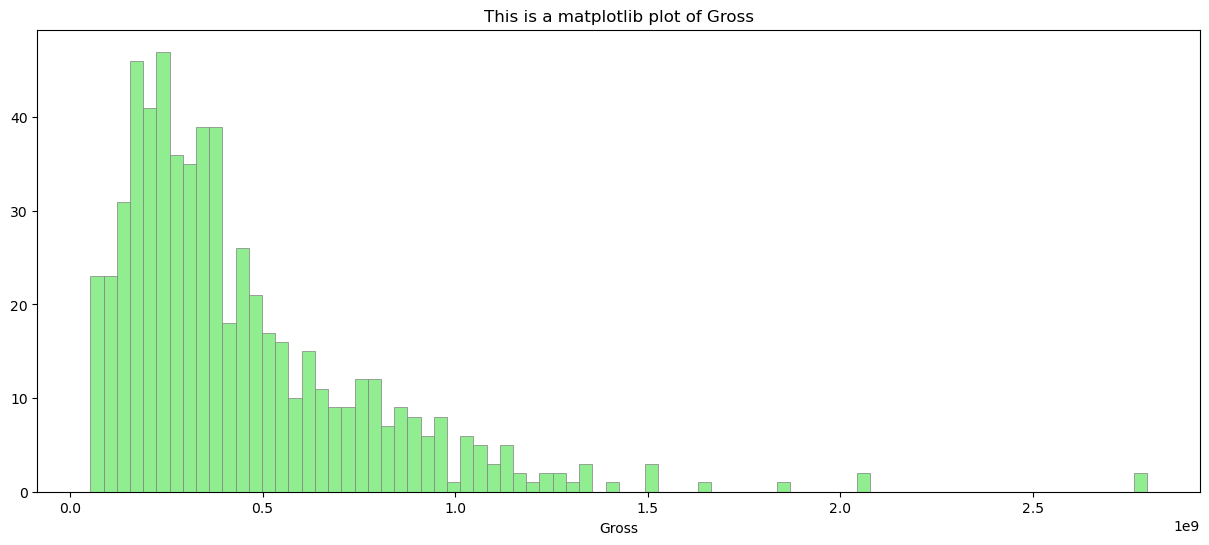

In [46]:
plt.figure(figsize=(15, 6))
plt.title("This is a matplotlib plot of Gross")
plt.xlabel("Gross")

plt.hist(movies['Gross'], color='lightgreen', bins=80,
         edgecolor='grey', linewidth=0.5)
plt.show()

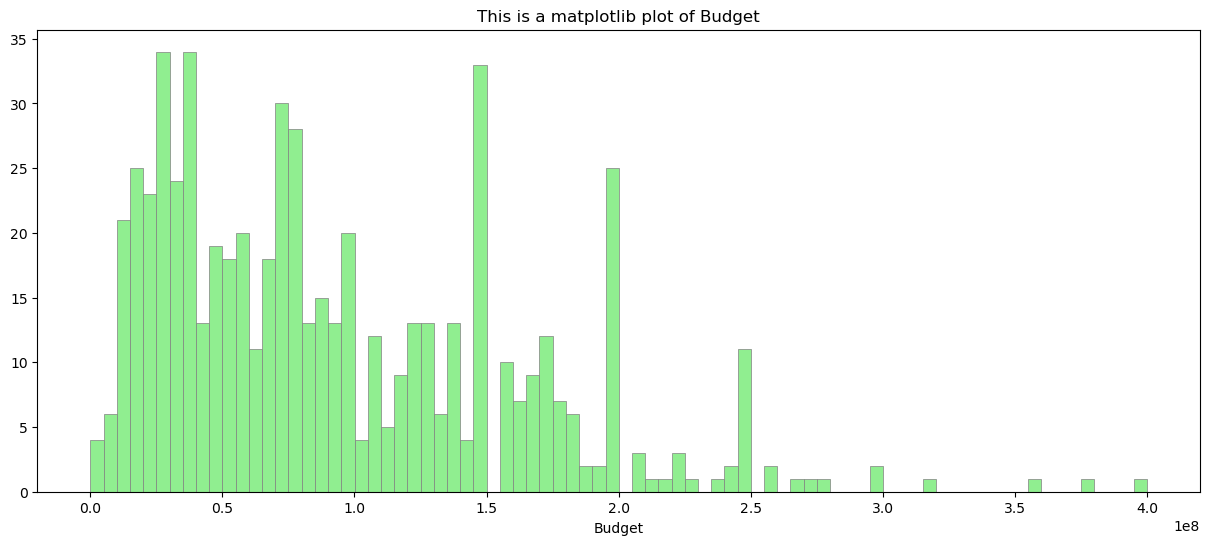

In [47]:
plt.figure(figsize=(15, 6))
plt.title("This is a matplotlib plot of Budget")
plt.xlabel("Budget")

plt.hist(movies['Budget'], color='lightgreen', bins=80,
         edgecolor='grey', linewidth=0.5)
plt.show()


Notice how the 2 histogram have different y axis. if we want to have them side by side, we should have a common y axis

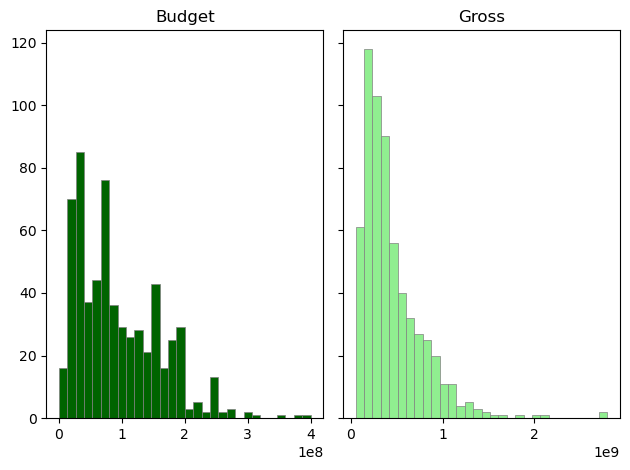

In [51]:
# We create two plots side by side to show the differences or similarities easily. 
# However, it is always best to show a similar Y-Axis when showing two plots side by side. 

fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) # sharey = "row" makes the y-axis similar.

axs[0].set_title("Budget")
axs[1].set_title("Gross")

axs[0].hist(movies['Budget'], color='darkgreen', bins=30,
         edgecolor='grey', linewidth=0.5)
axs[1].hist(movies['Gross'], color='lightgreen', bins=30,
         edgecolor='grey', linewidth=0.5)
         
plt.show()

## Boxplots

### Matplotlib

Text(0.5, 1.0, 'Relation between Genre and Budget using Matplotlib')

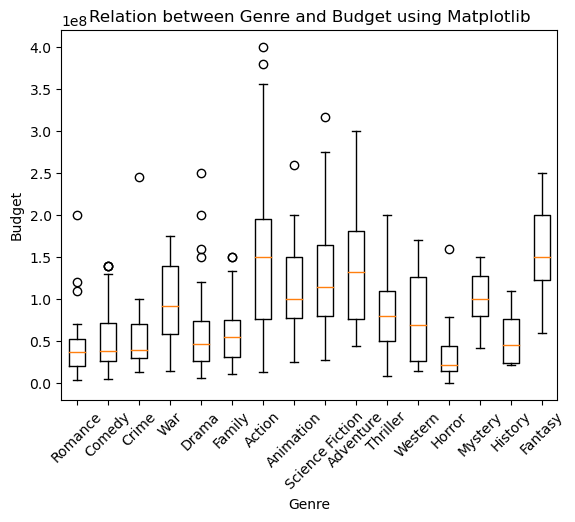

In [69]:
genre_budget = {}
for i in movies['Genre'].unique():
    genre_budget[i] = movies[movies['Genre'] == i].Budget
plt.boxplot([x for x in genre_budget.values()],
            labels=[x for x in genre_budget.keys()])
#x and y-axis labels
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45)

#plot title
plt.title('Relation between Genre and Budget using Matplotlib')


### Seaborn

Text(0.5, 1.0, 'Relation between Genre and Budget')

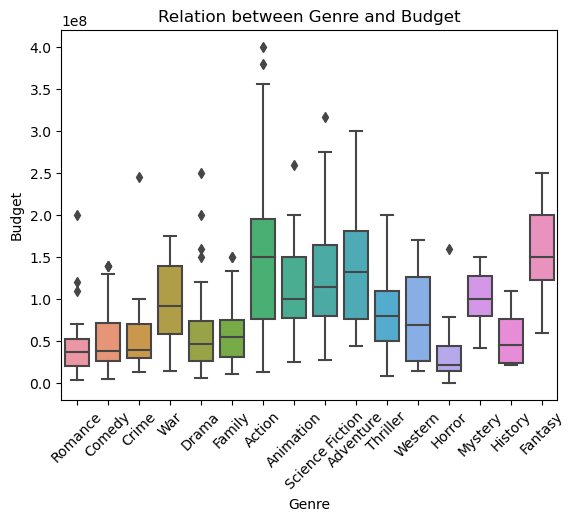

In [68]:
ax = sns.boxplot(data = movies, y = "Budget", x = "Genre")
ax.tick_params(axis='x', labelrotation=45)

plt.title('Relation between Genre and Budget using Seaborn')



# Histplot

### Seaborn

<AxesSubplot:xlabel='Rating', ylabel='Count'>

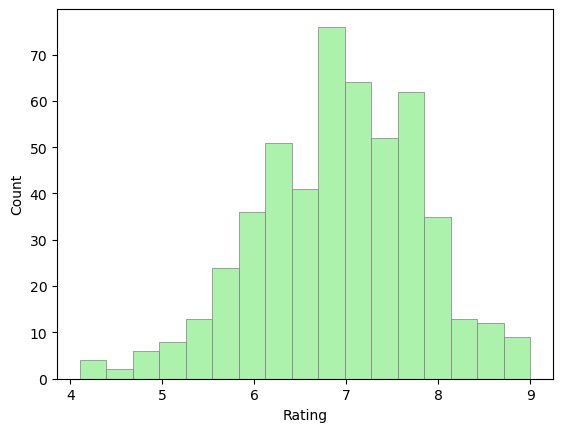

In [17]:
sns.histplot(data=movies, x="Rating",
             color='lightgreen',edgecolor='grey', linewidth=0.5)


<AxesSubplot:xlabel='Budget', ylabel='Count'>

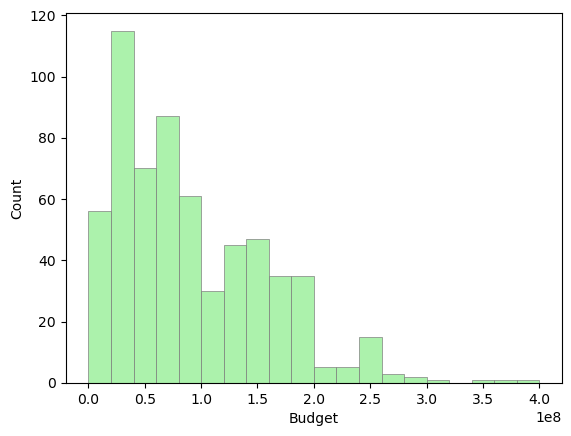

In [74]:
sns.histplot(data = movies, x = movies["Budget"],
             color = 'lightgreen', edgecolor = 'grey', linewidth = 0.5, bins = 20)

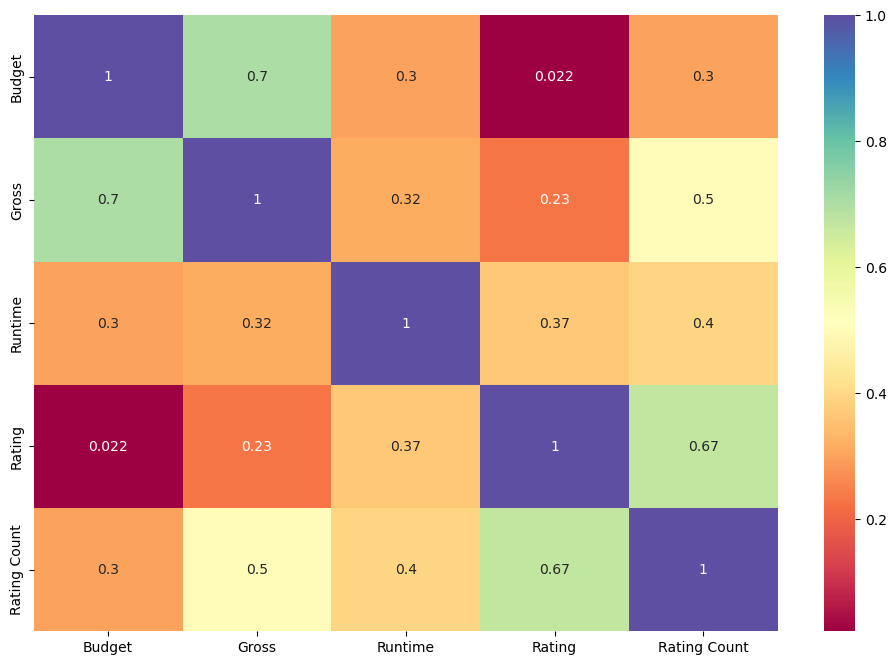

In [17]:
# Basic heat map to show correlation between features. 

plt.figure(figsize=(12,8))

# Find the correlation between variables and store than in a variable which
# will be used to create the heat map.
corr = movies.corr()

sns.heatmap(corr, annot=True, cmap='Spectral')

plt.show()

In [84]:
print("The median of Rating: ", movies["Rating"].median())
print("The mean of Rating: ", movies["Rating"].mean())
print("The skew of Rating: ", movies["Rating"].skew())
print("The mode of Rating: ", movies["Rating"].mode())

The median of Rating:  6.9
The mean of Rating:  6.917322834645666
The skew of Rating:  -0.29148246606330247
The mode of Rating:  0    6.9
Name: Rating, dtype: float64


In [83]:
print("The median of Budget: ", movies["Budget"].median())
print("The mean of Budget: ", movies["Budget"].mean())
print("The skew of Budget: ", movies["Budget"].skew())
print("The mode of Budget: ", movies["Budget"].mode())

The median of Budget:  80000000.0
The mean of Budget:  94917098.43577236
The skew of Budget:  1.01500605044472
The mode of Budget:  0    150000000
Name: Budget, dtype: int64
